## Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

## Load Dataset

In [46]:
file_path = r"C:\Users\DELL\Desktop\ccc\lung_cancer_examples.csv"
df = pd.read_csv(file_path)

## Basic Exploration of dataset

In [48]:
df.head(10)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [49]:
df.tail(10)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
49,Katharine,Hepburn,62,20,5,6,1
50,Katharine,Hepburn,42,12,6,2,0
51,Barbra,Streisand,44,30,1,6,1
52,Maggie,Smith,26,34,1,8,1
53,Glenda,Jackson,35,20,5,1,0
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [50]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [52]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


## Clean and Prepare Dataset

In [66]:
# Keep only the needed columns
df = df[['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result']]

# Fix spelling issue
df = df.rename(columns={'Alkhol': 'Alcohol'})

# Drop missing values
df = df.dropna()

## Feature Matrix (X) and Target Vector (y)

In [71]:
X = df[['Age', 'Smokes', 'AreaQ', 'Alcohol']]
y = df['Result']

## Train-Test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Standardize Numeric Features

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

## ROC Curve & AUC Score

AUC Score: 1.0


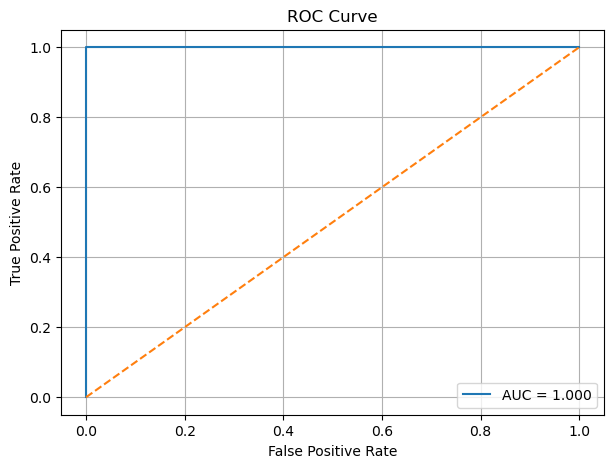

In [83]:
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Model (for comparison)

In [85]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_pred))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



## Feature Importance (Random Forest)

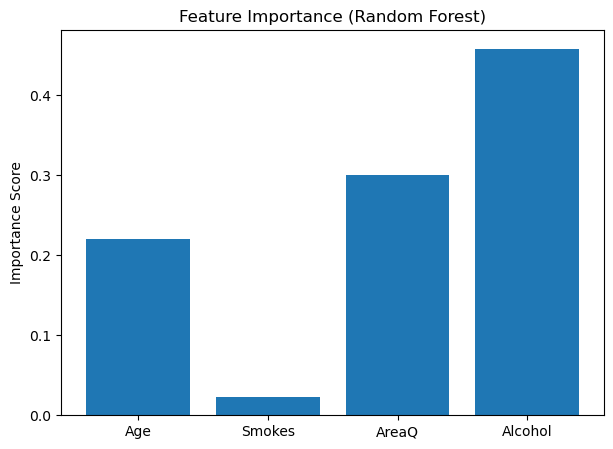

In [89]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
plt.bar(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

## Save the Trained Model

In [92]:
import joblib

joblib.dump(log_reg, "lung_cancer_logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']